In [1]:
pip install tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install streamlit

  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     -------------------------- ----------- 30.7/44.3 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 44.3/44.3 kB 272.4 kB/s eta 0:00:00
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install matplotlib
!pip install opencv-python
!pip install keras
!pip install tensorflow

In [1]:
import os
import cv2
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!pip install --upgrade keras

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 77.3 kB/s eta 0:00:16
   - -------------------------------------- 0.0/1.2 MB 77.3 kB/s eta 0:00:16
   - -------------------------------------- 0.0/1.2 MB 77.3 kB/s eta 0:00:16
   - -------------------------------------- 0.0/1.2 MB 77.3 kB/s eta 0:00:16
   - -------------------------------------- 0.0/1.2 MB 65.5 kB/s eta 0:


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout, BatchNormalization,Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint


from sklearn.utils import shuffle
from tensorflow.keras import regularizers

In [8]:
import cv2
import numpy as np
import os

def is_homogeneous_pattern(image, contour, std_dev_threshold=10):
    x, y, w, h = cv2.boundingRect(contour)
    roi = image[y:y + h, x:x + w]

    # Calculate the standard deviation of pixel values within the region
    std_dev = np.std(roi)

    return std_dev > std_dev_threshold
    
def is_contour_closed(contour, epsilon=0.02):
    approx = cv2.approxPolyDP(contour, epsilon * cv2.arcLength(contour, True), True)
    return len(approx) >= 4

def is_dot_circle(contour, aspect_ratio_threshold=0.8):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h if h != 0 else 0
    return aspect_ratio <= aspect_ratio_threshold
    
def drawcontouredimg(image,resize=False):
    if (resize==True):
        image = cv2.resize(image, (224, 224))
        
    image = np.uint8(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contour_thickness = 1
    contour_color = (0, 255, 0)
    min_area_threshold = 10
    max_area_threshold = 2000
    aspect_ratio_threshold = 0.2
    
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    selected_contours = [contour for contour in contours if (cv2.contourArea(contour) >= min_area_threshold and 
                                                                 cv2.contourArea(contour) <= max_area_threshold) and is_contour_closed(contour)
                                                                 and not is_dot_circle(contour, aspect_ratio_threshold)]
    
    result = image.copy()
    result = cv2.drawContours(result.astype(np.float32), selected_contours, -1, contour_color, contour_thickness)
    
    return (result / 255)

def read_images_from_folder(folder_path):
    image_files = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(folder_path, filename))
    
    for image_file in image_files:
        image = cv2.imread(image_file)
        processed_image = drawcontouredimg(image, resize=True)
        # Save or display the processed image here
        # ...

# Usage example
folder_path = "data"
read_images_from_folder(folder_path)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout, BatchNormalization,Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint


from sklearn.utils import shuffle
from tensorflow.keras import regularizers

In [12]:

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 256
train_data_dir = "Training"
validation_data_dir ="Testing"
train_datagen =ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    preprocessing_function=drawcontouredimg,
    horizontal_flip=True
)
validation_datagen =ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=drawcontouredimg)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary', 
    shuffle=True,
    classes=['normal', 'cracked']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    classes=['normal', 'cracked']
)



Found 13 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [22]:
def create_model(dropout=0.5, lrrate=1e-3, optimizer='adam',neuronset=128):
    base_model = tf.keras.Sequential([
      
      keras.layers.Conv2D(neuronset, (3,3), activation='relu', input_shape=(224,224,3)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(dropout),
      
      keras.layers.Conv2D(neuronset*2, (3,3), activation='relu'),
      
      keras.layers.MaxPooling2D(2,2), 
     
      keras.layers.Conv2D(neuronset*3, (3,3), activation='relu'),
      
      keras.layers.MaxPooling2D(2,2),
     
      keras.layers.Flatten(),
      keras.layers.Dense(neuronset*2, activation='relu'),
      keras.layers.Dropout(dropout),
      keras.layers.Dense(neuronset, activation='relu'),
      keras.layers.Dropout(dropout),
      keras.layers.Dense(round(neuronset/0.5), activation='relu'),
      keras.layers.Dropout(dropout),
      keras.layers.Dense(1, activation='sigmoid')
    ])

    model_resnet50 = Model(inputs=base_model.input,
                           outputs=base_model.output)

    if (optimizer=='sgd'):
       opt = tf.keras.optimizers.SGD(learning_rate=lrrate)
    elif(optimizer=='rmsprop'):
       opt = tf.keras.optimizers.RMSprop(learning_rate=lrrate)
    else:    
       opt = tf.keras.optimizers.Adam(learning_rate=lrrate)
        
    model_resnet50.compile(optimizer=opt,    
                           loss='binary_crossentropy',    
                           metrics=['accuracy'])
    model_resnet50.save('resnet50-car.keras')
    
    return model_resnet50


In [23]:
checkpoint = ModelCheckpoint('resnet50_car.keras',
                             verbose = 1,
                             save_best_only = True,
                             monitor='val_accuracy',
                             mode='max')
earlystop = EarlyStopping(monitor='val_accuracy',
                         patience=10,
                         mode='max',
                         verbose=1,
                         restore_best_weights=True
                         )

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.00001, 
                                            min_lr=1e-10)

callbacks = [earlystop, learning_rate_reduction,checkpoint]



In [24]:
!pip install tqdm

import tqdm
train_generator.reset()

X=[]
Y=[]
X_val=[]
Y_val=[]

for i in tqdm.tqdm(range(int(train_generator.n/BATCH_SIZE))): 
  img, label = next(train_generator)
  X.append(np.array(img))
  Y.append(np.array(label))

validation_generator.reset()

for i in tqdm.tqdm(range(int(validation_generator.n/BATCH_SIZE))): 
  img, label = next(validation_generator)
  X.append(np.array(img))
  Y.append(np.array(label))
  X_val.append(np.array(img))
  Y_val.append(np.array(label))




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [26]:
X_train=[]
Y_train=[]
for i in range(len(X)):
    for m in range(len(X[i])):
        X_train.append(X[i][m])
        Y_train.append(Y[i][m])

print(len(X_train),len(Y_train))


0 0


In [10]:
model_resnet50=create_model(0.3, lrrate=1e-5, optimizer='adam',neuronset=128)

In [11]:
X_val_=[]
Y_val_=[]
for i in range(len(X_val)):
    for m in range(len(X_val[i])):
        X_val_.append(X_val[i][m])
        Y_val_.append(Y_val[i][m])

print(len(X_train),len(Y_train))
model_history=model_resnet50.fit(np.array(X_train),np.array(Y_train),callbacks=callbacks,   
                              validation_data=(np.array(X_val_),np.array(Y_val_)),epochs=20)
model_resnet50.save('resnet50_cartyre_4_1.hdf5')
model_resnet50.save_weights('resnet50_cartyre_4_1_weight.h5')


703 703
Epoch 1/20


22/22 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.4865
Epoch 1: val_accuracy improved from -inf to 0.51309, saving model to resnet50_cartyre_4_1.hdf5


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 84s 4s/step - loss: 0.6965 - accuracy: 0.4865 - val_loss: 0.6935 - val_accuracy: 0.5131 - lr: 1.0000e-05
Epoch 2/20
22/22 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5021
Epoch 2: val_accuracy did not improve from 0.51309
22/22 [==============================] - 73s 3s/step - loss: 0.6937 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.5131 - lr: 1.0000e-05
Epoch 3/20
22/22 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.5092
Epoch 3: val_accuracy improved from 0.51309 to 0.51832, saving model to resnet50_cartyre_4_1.hdf5
22/22 [==============================] - 75s 3s/step - loss: 0.6967 - accuracy: 0.5092 - val_loss: 0.6911 - val_accuracy: 0.5183 - lr: 1.0000e-05
Epoch 4/20
22/22 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.5320
Epoch 4: val_accuracy improved from 0.51832 to 0.60733, saving model to resnet50_cartyre_4_1.hdf5
22/22 [==========================

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Training and validation loss')

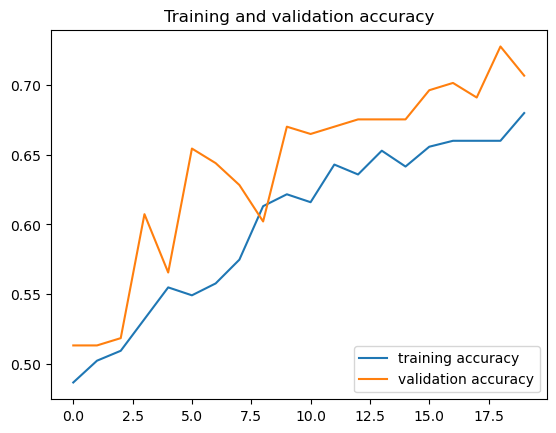

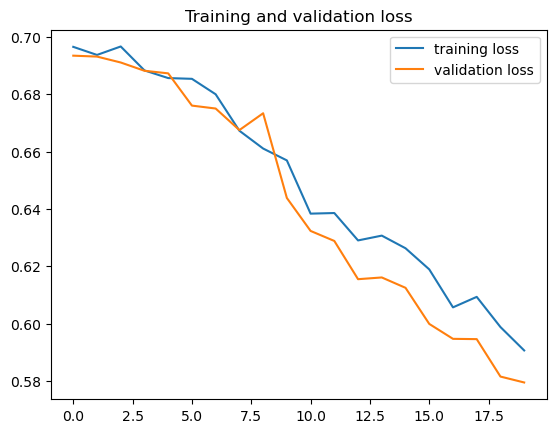

In [13]:
## Accuracy and Loss plots

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')



1/1 [==============================] - 0s 487ms/step





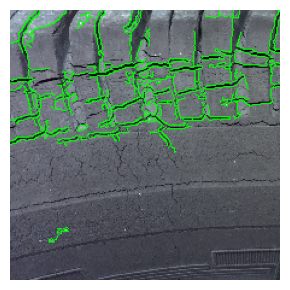

Predictions-> [[0.45756516]]  Predicted: Good Quality
1/1 [==============================] - 0s 80ms/step





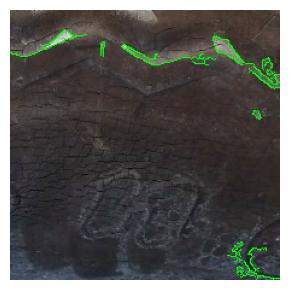

Predictions-> [[0.4366859]]  Predicted: Good Quality
1/1 [==============================] - 0s 77ms/step





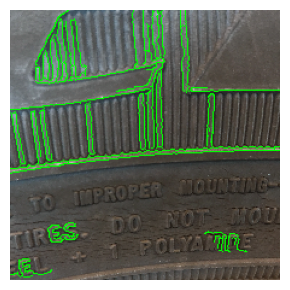

Predictions-> [[0.56738216]]  Predicted: Bad Quality
1/1 [==============================] - 0s 67ms/step





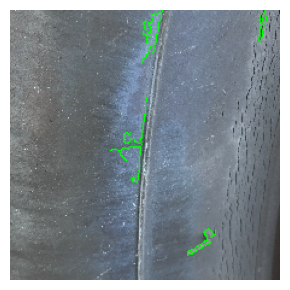

Predictions-> [[0.3624476]]  Predicted: Good Quality
1/1 [==============================] - 0s 68ms/step





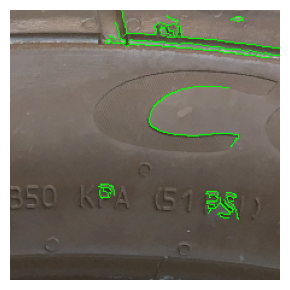

Predictions-> [[0.4261339]]  Predicted: Good Quality
1/1 [==============================] - 0s 56ms/step





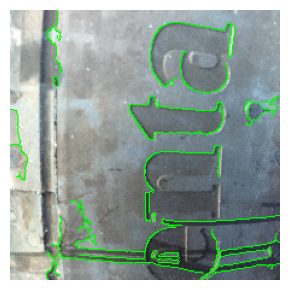

Predictions-> [[0.33946815]]  Predicted: Good Quality


In [9]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image



model_path='resnet50_cartyre_4_1.hdf5'
loaded_model = load_model(model_path)
loaded_model.load_weights('resnet50_cartyre_4_1_weight.h5') 

def predictimage(model,path):
    img=cv2.imread(path)
    img=drawcontouredimg(img,True)
    resized_input =np.expand_dims(img.copy(), axis=0)
    predictions = model.predict(resized_input)
    print("\n\n")
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    axes.imshow(img)
    axes.axis('off')
    plt.tight_layout()
    plt.show()
    if predictions[0][0] > 0.5:
        print("Predictions->",predictions," Predicted: Bad Quality")
    else:
        print("Predictions->",predictions," Predicted: Good Quality")

predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/cracked/Cracked-2.jpg")
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/cracked/Cracked-41.jpg")
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/cracked/IMG_4480.jpg")
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/cracked/IMG_4278.jpg")
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/normal/Normal-416.jpg")
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/normal/Untitled-47.jpg")

1/1 [==============================] - 0s 204ms/step





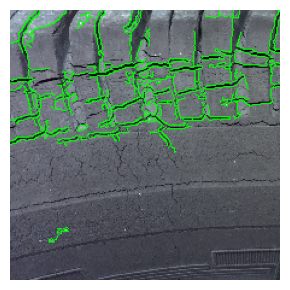

Predictions-> [[0.45756516]]  Predicted: Good Quality


In [23]:
predictimage(loaded_model,"C:/ai/Tire Textures/testing_data/cracked/Cracked-2.jpg")


1/1 [==============================] - 0s 80ms/step





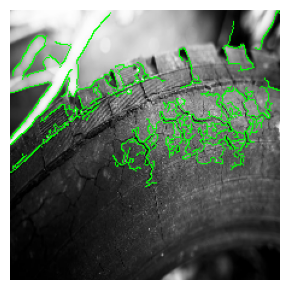

Predictions-> [[0.38233653]]  Predicted: Good Quality


In [24]:
predictimage(loaded_model,"C:/Users/harsh/Downloads/cracked.jpg")